# The Erying Equation and Experimental Error
The famous Erying equationis used to create a linear equation that relates the free energy of activation or the free energy in an equilibrium with temperature. Because the enthalpy term is independant of temperature and the entropy term involves temperature, we can the separate these effects and determine the enthalpy and the entropy difference in the chemical change between reactants and transtion state or products. But, do you numbers make sense? Unless you are calculating the standard deviations from your plot you may be unaware of a low quality relationship.

## Enzyme Kinetics Example

The data sets for this experiment comes from "Linear Eyring Plots Conceal a Change in the Rate-Limiting Step in an Enzyme Reaction", Teresa F. G. Machado, Tracey M. Gloster, and Rafael G. da Silva, *Biochemistry*, **2018**, *57*, 6757-6761.https://doi.org/10.1021/acs.biochem.8b01099.

Machado et al. were presenting an example where they hypothesized that there was a hidden effect due to changes in the rate-determining step. The plots are very linear so we will use the data at face value. I'm not really convinced that there was a change in rds.

The reaction is the reduction of acetoacetate (3-oxobutanoate) or 3-Oxopentanoate by NADH with the action of *(R)-3-hydroxybutyrate dehydrogenase* (EC 1.1.1.30). Two sources of the enzyme were used. The common bacteria *Acinetobacter baumannii* and the cold-favouring (psychrophilic) bacteria *Psychrobacter arcticus*. The Michaelis-Menten turnover number ($k_{cat}$, the first-order rate constant of the enzyme-NADH-substrate complex to give product) was measured at temperatures for $-10$ to $67\ ^\circ C$. The Eyring plot for the *P. arcticus* curves slightly as temperature increases. The enzyme comes from an organism adapted got cold conditions. The plot for the *A. baumannii* enzyme were linear so I will only use that data in this example.


## The Eyring Equation

The Erying equation is...

$$ k = \frac{\kappa k_B}{h} T e^{-\Delta G^\ddagger}$$

...and we can include that $\Delta G^\ddagger = \Delta H^\ddagger - T \Delta S^\ddagger$ and we obtain...

$$ k = \frac{\kappa k_B}{h} T e^{\frac{-\Delta H^\ddagger}{RT}}e^{\frac{\Delta S^\ddagger}{R}}$$

This can be written in a linear form...

$$\ln \frac{k}{T} = \frac{-\Delta H^\ddagger}{R}\cdot\frac{1}{T} + \ln\frac{\kappa k_B}{h} + \frac{\Delta S^\ddagger}{R}$$

...where $k$ is the observed rate constant and $T$ is the absolute temperature.

From this, we can find $\Delta H^\ddagger$ and $\Delta S^\ddagger$ from the slope and intercept by plotting $\ln \frac{k}{T}$ vs. $\frac{1}{T}$

## Choose Your Data

In the code below we call the packages and define clobal variables. One important variable is the name of the data file. The following data files are available.

> Eryingdata1.csv - *AbHBDH* with 3-oxobutyrate <br>
Eryingdata2.csv - *AbHBDH* with 3-oxopentanoate

change the datafile variable to repeat this notebook with the other data set. There are several more data sets from two other recent contributions that are described at the end of this document. Try them and see what the effect of more or less data has on you error for calculating the parameters of the Eyring plot

In [309]:
### Setup packagaes and global variables

from scipy.optimize import curve_fit     ## tool for curve fitting
import scipy                             ## tools for science
import numpy as np                       ## import the tools of NumPy but use a shorter name
import pandas as pd                      ## import tools for data handling
from matplotlib import pyplot as plt     ## tools for plotting

import uncertainties as un               ## tool set for handling numbers with uncertainties
from uncertainties import unumpy as unp  ## a replacement for numpy that uses uncertainty values
from uncertainties import umath as um    ## a replacement for math that uses uncertainty values

github_location = "./"                   ## Use either local folde or github folder. use github locations for Colab
github_location_styles = "./"
#github_location = "https://raw.githubusercontent.com/blinkletter/3530Biochem/main/data/"
#github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"

datafile = "data/EryingData1.csv"   # change this file for new data
#datafile = "data/EryingData2.csv"  
#datafile = "data/EryingDataC1.csv"  # see bottom of notebook for more info


In [310]:
### Inspect the data file

with open(datafile, 'r') as file:
    file_content = file.read()  # Read the content of the file
    print(file_content)         # Print the content

# from "Linear Eyring Plots Conceal a Change in the Rate-Limiting Step in an Enzyme Reaction"
# Teresa F. G. Machado, Tracey M. Gloster, and Rafael G. da Silva
# Biochemistry 2018 57 (49), 6757-6761
# https://doi.org/10.1021/acs.biochem.8b01099
#
# data for Figure 1: AbHBDH with Acetoacetate 
"TEMP(K)", "Kcat(s-1)", "Error(s-1)"
283,     3.4,      0.1  
288,     5.3,      0.2  
293,     7.6,      0.2   
298,     11.7,     0.3 
303,     15.2,     0.1 
308,     21.3,     0.9 
313,     27.8,     0.9 
318,     39,       3 
323,     52,       4 
325,     61,       2 
328,     69,       3 
330,     79,       7 


In [311]:
### Read in data set

data = pd.read_csv(datafile, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 
#display(data)

In [312]:
### Calculate values for Eyring Plot

df = data                            # set the dataframe to be the dataframe read in above

#df = data.loc[[2,4,6,8]].copy()       # slice a set of rows from the dataframe to demonstrate
                                      #   a smaller dataset and the effect on precision

#df = data.loc[8:11].copy()             # slice consecutive rows



df["k_unc"] = unp.uarray(df["Kcat(s-1)"],df["Error(s-1)"])   # Combine value and stdev to make Uncertainties values
df["1/T"] = 1/df["TEMP(K)"]                                  # get 1/T for x-axis
df["ln(k)/T"] = unp.log(df["k_unc"]/df["TEMP(K)"])           # get ln(k/T) for y-axis with error propagation

display(df)


,TEMP(K),Kcat(s-1),Error(s-1),k_unc,1/T,ln(k)/T
0,283,3.4,0.1,3.40+/-0.10,0.003534,-4.422+/-0.029
1,288,5.3,0.2,5.30+/-0.20,0.003472,-4.00+/-0.04
2,293,7.6,0.2,7.60+/-0.20,0.003413,-3.652+/-0.026
3,298,11.7,0.3,11.70+/-0.30,0.003356,-3.238+/-0.026
4,303,15.2,0.1,15.20+/-0.10,0.003300,-2.992+/-0.007
5,308,21.3,0.9,21.3+/-0.9,0.003247,-2.67+/-0.04
6,313,27.8,0.9,27.8+/-0.9,0.003195,-2.421+/-0.032
7,318,39.0,3.0,39.0+/-3.0,0.003145,-2.10+/-0.08
8,323,52.0,4.0,52+/-4,0.003096,-1.83+/-0.08
9,325,61.0,2.0,61.0+/-2.0,0.003077,-1.673+/-0.033


## Remove the Lever Arm

The precision of the intercept is very low because of the huge distance that is covered between the data and the y-axis.

Let us simply subtract that difference. Suddenly the data spans the y-axis and the precision of the intecept is excellent. But, when we back-calculate to the rate at a given temperature, will all this get undone by the laws of mathematics or have we cracked the code and obtained better precision?

The sort answer is that your method matters. This method will indeed improve the precision. I will leave it to statisticians to argue its validity but at least every step is documented in the code. Anyone can see exactly what I did and make their comments accordingly.

0     0.000503
1     0.000442
2     0.000383
3     0.000325
4     0.000270
5     0.000216
6     0.000165
7     0.000114
8     0.000066
9     0.000047
10    0.000018
11    0.000000
Name: 1/T, dtype: float64


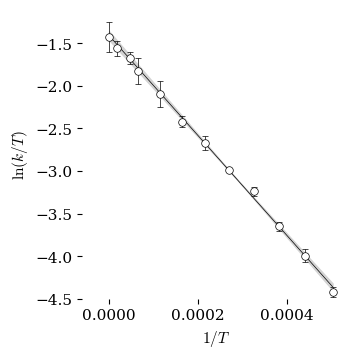

The slope is -5857.88 +/- 89.28
The intercept is -1.411 +/- 0.0254
The RSQ is 0.999


In [313]:
### Remove Lever Arm

### Choose our x and y values.
x = df["1/T"]
y = unp.nominal_values(df["ln(k)/T"])
y_err = unp.std_devs(df["ln(k)/T"])

#offset = 0.0033
offset = np.min(x)

x_o = x - offset
print(x_o)
nstd = 2.     # Number of sigmas for confidence interval 1 = 68%, 2 = 95%, 3 = 99.7% confidence

### Curve fit to linear function

def linear(x, slope, intercept):
    return slope * x + intercept

poptL,pcovL = curve_fit(linear, x_o, y, 
                       sigma = y_err, absolute_sigma=False  # Include st_devs for y data in calculations
                     )

[slope,intercept] = poptL
perr = np.sqrt(np.diag(pcovL))

### Create figure for plot
plt.rcdefaults()

style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

size = [4,4]
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=size)  

### Create plot #0 for plot

# Settings for plot
ax.set(
#          title = Title,       
          ylabel=r"$\ln (k / T)$", 
          xlabel=r"$1/T$",                
          xlim=[-0.00006,0.00054],                  
          ylim=[-4.5,-1.1]
       )

ax.set_xticks([0.000,0.0002,0.0004])

# Plot the data
#ax.scatter(x_o, y, marker = "o", s = 70, color = "white", alpha = 1.0, zorder = 1)
ax.scatter(x_o, y, marker = "o", s = 30, 
              color = "white", edgecolors = "black", 
              linewidths=0.5, zorder = 3) 

# Add error bars
ax.errorbar(x_o, y, yerr=2*y_err, xerr=None, fmt="None", 
               ecolor="black", elinewidth=0.5, 
               capsize=2, capthick=0.5, zorder=2)

# Calculate the line from curve fit parameters
x_fit = np.linspace(np.min(x_o), np.max(x_o), 100)
#x_fit = np.linspace(0, np.max(x_o), 100)
y_fit = linear(x_fit,slope,intercept)

# Plot the curve fit line
ax.plot(x_fit, y_fit, 
           marker = None, color = "black", 
           linewidth=0.5, zorder = 2)

# prepare confidence level curves
popt_plus = poptL + nstd * perr    # add error to parameters
popt_minus = poptL - nstd * perr   # subtract error from paramneters

# steeper slope will result in higher intercept and vice versa
confidence_line_1 = linear(x=x_fit, slope=popt_plus[0], intercept=popt_minus[1])
confidence_line_2 = linear(x=x_fit, slope=popt_minus[0], intercept=popt_plus[1])

# Plot confidence interval
ax.fill_between(x_fit, confidence_line_1, confidence_line_2, 
                   color="lightgray", alpha=1, zorder = 0,
                   label="confidence interval")

### Output plot
plt.tight_layout(pad=2, h_pad=None, w_pad=None, rect=None)
plt.savefig("Eyring_L.pdf")
plt.show()

print(f"The slope is {slope:0.2f} +/- {perr[0]:0.2f}")
print(f"The intercept is {intercept:0.3f} +/- {perr[1]:0.4f}")

r, p = scipy.stats.pearsonr(x, y)
rsq = r ** 2

print(f"The RSQ is {rsq:0.3f}")



## Calculate Activation Parameters

We now have values for the slope and intercept. We can use the definitions of the slope and intercept in the Erying equation to calculate the thermodynamic parameters for the transition state.

$$\text{slope} = \frac{-\Delta H^\ddagger}{R}$$

$$ \Delta H^\ddagger = -\text{slope}\cdot R$$

and

$$\text{intercept} = \ln\frac{\kappa k_B}{h} + \frac{\Delta S^\ddagger}{R}$$


$$\Delta S^\ddagger =\left( \text{intercept} - \ln\frac{\kappa k_B}{h}\right) R $$

$\kappa$ is the transmission coefficient and is assumed to be unity in transition state theory

$k_B$ is the Boltzman constant: $1.380649\times10^{23} \ J\, K^{-1}$

$R$ is the gas constant: $8.314462618 \ J\, mol^{-1} K^{-1}$ 

$h$ is the Planck constant: $6.62607015\times10^{-34}\ J\, s$

In [314]:
Temp = 325
R = scipy.constants.R
kb = scipy.constants.k
h = scipy.constants.h
kappa = 1

slope_unc = un.ufloat(slope, perr[0])
dH = -slope_unc * R
print(f"The change in enthalpy is {dH:0.2f} J/mole")

intercept_unc = un.ufloat(intercept, perr[1])
intercept_unc = intercept_unc - (slope_unc * offset)

#print(f"{intercept_unc:0.2f}")
dS = (intercept_unc - np.log(kb/h)) * R

print(f"The change in entropy is {dS:0.2f} J/mole.K")

## calculate k from Erying plot parameters.

kobs = (kappa * kb / h) * Temp * unp.exp(-dH/(R*Temp)) * unp.exp(dS/R)

print(f"calculate k at T={Temp} K is {kobs:0.2f}")



The change in enthalpy is 48705.16+/-742.32 J/mole
The change in entropy is -61.69+/-2.26 J/mole.K
calculate k at T=325 K is 60.32+/-1.55


### An observation about uncertainties

Observe that above we have an entropy value with a similar standard deviation for the previous method that strongly correclated slope and intercept in the Eyring plot. And yet, the error in the calculated rate constant using these values is much less than in the previous notebook. 


This was because, in order to calculate $\Delta S^\ddagger$ I mutltiplies the offset by the slope and added it to the intercept value. This correlates the value for $\Delta S^\ddagger$ to the uncertainty in the slope value. The *Uncertainties* package keeps track of these correlations. It knows where this value of $\Delta S^\ddagger$ came from and everything that has touched it.

If we create values for $\Delta S^\ddagger$ and $\Delta H^\ddagger$ directly as new uncertainty objects with no internal calculation history we get results like the previous notebook with a larger error, reflective of the larger apparent uncertainty in $\Delta S^\ddagger$ obtained by taking the intecept value and getting its value at the offset point. The code below will do this. Compare with the values determined above.

In [315]:
dS = un.ufloat_fromstr("-61.69+/-2.26")
dH = un.ufloat_fromstr("48705.16+/-742.32")

kobs = (kappa * kb / h) * Temp * unp.exp(-dH/(R*Temp)) * unp.exp(dS/R)

print(f"calculate k at T={Temp} K is {kobs:0.2f}")


calculate k at T=325 K is 60.34+/-23.32


## Including Uncertainties from the start

The ```scipy.stats.curve_fit()``` function reports the parameters and their errors separately as floating point numbers. It does not generate uncertainty values. We created the uncertainty values by combining each parameter with its standard deviation using the ```uncertainties.Ufloat()``` function.

The curve fitting packahae *LMfit* includes the *Uncertainties* package within it and will generate the parameters as uncertainty objects. I wonder if that means that the intercept object is aware of its strong correlation to slope. Let us give it a try

parameter names: ['slope', 'intercept']
independent variables: ['x']
None
16.34+/-0.29
-5857.88+/-89.28


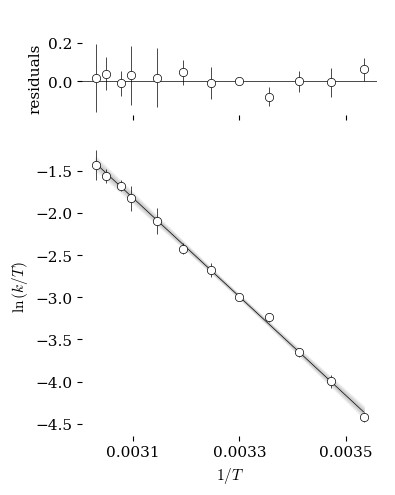

The change in enthalpy is 48705.16+/-742.32 J/mole
The change in entropy is -61.69+/-2.45 J/mole.K
calculate k at T=325 K is 60.32+/-1.30


In [337]:
#!pip install lmfit  ### uncomment to install if needed

import lmfit         ### must be installed with !pip install lmfit
                     ### uncertainties will be installed as a dependancy
                     ### for docs see https://lmfit.github.io/lmfit-py/

x = df["1/T"]
y = unp.nominal_values(df["ln(k)/T"])
y_err = unp.std_devs(df["ln(k)/T"])

def linear(x, slope, intercept):
    return slope * x + intercept


mod = lmfit.Model(linear)                            # load the function f as the model to be fit
print(f'parameter names: {mod.param_names}')
print(f'independent variables: {mod.independent_vars}')
pars = mod.make_params(slope=-1000, intercept=-1  )   # state the parameters (use the text strings that we used above in sympy)
                                                # initial values are also set here

result = mod.fit(y, pars, x=x, weights=1.0/y_err)             # use the .fit method on the model object to perform the curve fit
                                           # the variable in this function is 't' so we must use that in the call

#result.conf_interval("lsquares", result=result, 
#                     p_names=["slope","intercept"], sigmas=None, trace=False, 
#                     maxiter=200, verbose=False, prob_func=None)
print(result.ci_out)
##########################
### get the results 
##########################

#print(result.fit_report())
#print(result.ci_report())


intercept = result.uvars['intercept']         ### collect parameters as uncertain values
slope = result.uvars['slope']

print(f"{intercept:3u}")
print(f"{slope:0.4u}")
plt.rcdefaults()
style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)


fig = plt.figure(figsize = [4,5])
result.plot(fig = fig,
            fig_kws = {},
            xlabel = r"$1/T$",
            ylabel = r"$\ln \left( k/T \right)$",
            yerr = 2*y_err,
            title = " ",
            data_kws ={"color":"k", "linestyle":"None", "linewidth": 0.5,"markerfacecolor": "white",
                       "markeredgecolor":"black", "markeredgewidth":0.5, "zorder":3},
            fit_kws ={"linewidth": 0.5, "zorder":2},
            ax_res_kws = {},
            ax_fit_kws = {},
            )

ax = fig.axes   # get the axes from the plot (there are two in a list)


ax[1].set_xticks([0.0031,0.0033,0.0035])  # These will be the ticks for both axes


### Confidence band
dely = result.eval_uncertainty(x=x)
#plt.plot(x, y, "o")
#plt.plot(x, result.best_fit, "k-")
ax[1].fill_between(x, result.best_fit-3*dely, result.best_fit+3*dely, color='#EEEEEE', zorder=1)
ax[1].fill_between(x, result.best_fit-2*dely, result.best_fit+2*dely, color='#DDDDDD', zorder=1)
ax[1].fill_between(x, result.best_fit-1*dely, result.best_fit+1*dely, color='#CCCCCC', zorder=1)

### do not show legend 
fig.legend([])
ax[1].legend([])      # blank legend

fig.savefig("plots/LMfitplot1.pdf")
plt.show()






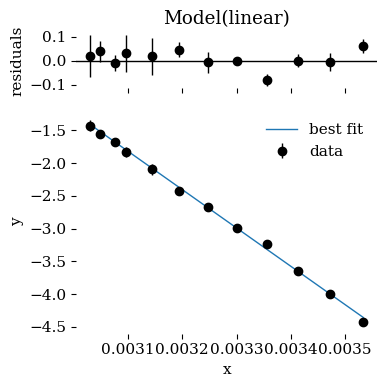

array([ 34.        ,  26.5       ,  38.        ,  39.        ,
       152.        ,  23.66666667,  30.88888889,  13.        ,
        13.        ,  30.5       ,  23.        ,  11.28571429])

In [336]:
result.plot()
plt.show()
result.weights

In [318]:
Temp = 280
R = scipy.constants.R
kb = scipy.constants.k
h = scipy.constants.h
kappa = 1

dH = -slope * R
print(f"The change in enthalpy is {dH:0.2f} J/mole")

dS = (intercept - np.log(kb/h)) * R
print(f"The change in entropy is {dS:0.2f} J/mole.K")

## calculate k from Erying plot parameters.
kobs = (kappa * kb / h) * Temp * unp.exp(-dH/(R*Temp)) * unp.exp(dS/R)
print(f"calculate k at T={Temp} K is {kobs:0.2ue}")

The change in enthalpy is 48705.16+/-742.32 J/mole
The change in entropy is -61.69+/-2.45 J/mole.K
calculate k at T=280 K is (2.869+/-0.072)e+00


In [319]:
Temp = 300
R = scipy.constants.R
kb = scipy.constants.k
h = scipy.constants.h
kappa = 1

dH_L = []; dS_L = []; kobsL = [];err=[]
Temps = np.arange(250,331,1)
for Temp in Temps:

    dH = -slope * R
    #print(f"The change in enthalpy is {dH:0.2f} J/mole")
    
    dS = (intercept - np.log(kb/h)) * R
    #print(f"The change in entropy is {dS:0.2f} J/mole.K")
    
    ## calculate k from Erying plot parameters.
    kobs = (kappa * kb / h) * Temp * unp.exp(-dH/(R*Temp)) * unp.exp(dS/R)
    #print(f"calculate k at T={Temp} K is {kobs:0.2ue}")

    dH_L.append(dH)
    dS_L.append(dS)
    kobsL.append(kobs)
    err.append(kobs.s)

print(err)

[0.013047978434730712, 0.014058080917441413, 0.015129840019378046, 0.016265456425132486, 0.01746704961406227, 0.018736635047092262, 0.02007609911561407, 0.021487171730951913, 0.022971396434637626, 0.024530097913299326, 0.02616434680774186, 0.027874921714346655, 0.029662268288914738, 0.031526455379391596, 0.03346712813562389, 0.035483458072781734, 0.03757409010210189, 0.03973708659038408, 0.04196986857111647, 0.044269154308919874, 0.046630895520047094, 0.04905021168125743, 0.051521323025844175, 0.05403748303985795, 0.056590911548265545, 0.0591727298393254, 0.061772899742035946, 0.06438016918141276, 0.06698202753755489, 0.06956467519246047, 0.07211301305316321, 0.07461065971475035, 0.07704000644319221, 0.07938232355241993, 0.08161793635039788, 0.08372649508702679, 0.08568737187073812, 0.08748022916252547, 0.08908582029250597, 0.09048710381721327, 0.09167078192379408, 0.0926294096823937, 0.09336426655487058, 0.09388923007977351, 0.09423593080382817, 0.09446046504301613, 0.0946518308245529

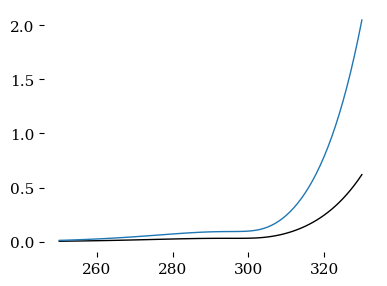

In [320]:
plt.plot(Temps,(err/Temps*100))
plt.plot(Temps,(err))

In [321]:
#help(lmfit.confidence)

In [322]:
dir(result.dely)

['T',
 '__abs__',
 '__add__',
 '__and__',
 '__array__',
 '__array_finalize__',
 '__array_function__',
 '__array_interface__',
 '__array_prepare__',
 '__array_priority__',
 '__array_struct__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__class_getitem__',
 '__complex__',
 '__contains__',
 '__copy__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dir__',
 '__divmod__',
 '__dlpack__',
 '__dlpack_device__',
 '__doc__',
 '__eq__',
 '__float__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__ilshift__',
 '__imatmul__',
 '__imod__',
 '__imul__',
 '__index__',
 '__init__',
 '__init_subclass__',
 '__int__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__irshift__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lshift__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__o

<Axes: title={'center': 'Model(linear)'}, xlabel='x', ylabel='y'>

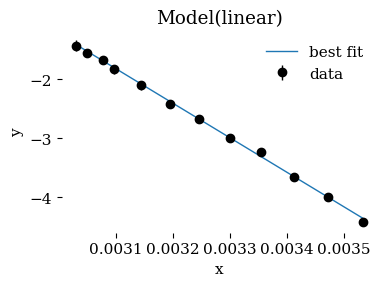

In [323]:
result.plot_fit()

In [324]:
dir(result)

['_Minimizer__jacobian',
 '_Minimizer__residual',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abort',
 '_calculate_covariance_matrix',
 '_calculate_uncertainties_correlations',
 '_err_max_evals',
 '_err_nonparam',
 '_int2ext_cov_x',
 '_lnprob',
 '_repr_html_',
 'aborted',
 'aic',
 'ampgo',
 'basinhopping',
 'best_fit',
 'best_values',
 'bic',
 'brute',
 'calc_covar',
 'call_kws',
 'chisqr',
 'ci_out',
 'ci_report',
 'col_deriv',
 'components',
 'conf_interval',
 'covar',
 'data',
 'dely',
 'dely_comps',
 'dual_annealing',
 'dump',
 'dumps',
 'emcee',
 'errorbars',
 'eval',
 'eval_components',
 'eval_uncertainty',
 'fit',
 'fit_report',
 'flatchai

In [325]:
help(result.eval_uncertainty)

Help on method eval_uncertainty in module lmfit.model:

eval_uncertainty(params=None, sigma=1, **kwargs) method of lmfit.model.ModelResult instance
    Evaluate the uncertainty of the *model function*.
    
    This can be used to give confidence bands for the model from the
    uncertainties in the best-fit parameters.
    
    Parameters
    ----------
    params : Parameters, optional
        Parameters, defaults to ModelResult.params.
    sigma : float, optional
        Confidence level, i.e. how many sigma (default is 1).
    **kwargs : optional
        Values of options, independent variables, etcetera.
    
    Returns
    -------
    numpy.ndarray
        Uncertainty at each value of the model.
    
    Notes
    -----
    1. This is based on the excellent and clear example from
       https://www.astro.rug.nl/software/kapteyn/kmpfittutorial.html#confidence-and-prediction-intervals,
       which references the original work of:
       J. Wolberg, Data Analysis Using the Method 

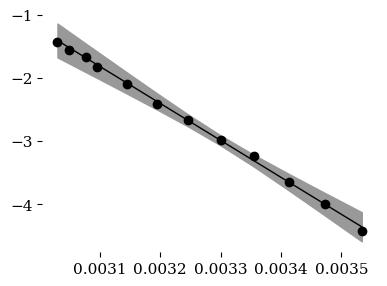

In [326]:
dely = result.eval_uncertainty(x=x)
plt.plot(x, y, "o")
plt.plot(x, result.best_fit, "k-")
#plt.fill_between(x, result.best_fit-3*dely, result.best_fit+3*dely, color='#DDDDDD')
plt.fill_between(x, result.best_fit-2*dely, result.best_fit+2*dely, color='#BBBBBB')
plt.fill_between(x, result.best_fit-10*dely, result.best_fit+10*dely, color='#999999')


In [327]:
y


array([-4.42167147, -3.99525366, -3.65202436, -3.23750464, -2.99243738,
       -2.67139271, -2.42116717, -2.09848974, -1.8264086 , -1.67295132,
       -1.5589071 , -1.4296448 ])

In [328]:
result.best_fit

array([-4.35907354, -3.99971178, -3.65261493, -3.31716563, -2.99278726,
       -2.67894065, -2.37512109, -2.08085561, -1.79570051, -1.6840952 ,
       -1.51923917, -1.41100037])